In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score
from sklearn.pipeline import Pipeline

In [168]:
df = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [169]:
df.drop(columns=["User ID","Gender"],inplace=True)
df.rename(columns = {'EstimatedSalary' : 'Salary'} , inplace = True)

In [170]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased' , axis = True) , df['Purchased'] , test_size = 0.3 , random_state=0)

In [171]:
print('the shape of the x train data is ' + str(x_train.shape))
print('the shape of the x test data is ' + str(x_test.shape))

the shape of the x train data is (280, 2)
the shape of the x test data is (120, 2)


<div style="text-align:center; background-color:#dc3545; padding:20px;">
  <h1 style="font-size:36px; color:#ffeeba;"><b>1.Scaling the Features</b></h1>
</div>


# Feature Scaling using StandardScaler in scikit-learn

## Introduction
Feature scaling is a crucial step in preprocessing data for machine learning models. It involves transforming the values of different features of the dataset to a standard scale, improving the performance and convergence of many machine learning algorithms. One common method for feature scaling is using the `StandardScaler` from the scikit-learn library.

## 1. StandardScaler
`StandardScaler` is a preprocessing technique in scikit-learn that standardizes features by removing the mean and scaling to unit variance. It transforms the data in such a way that it has a mean of 0 and a standard deviation of 1. This is achieved by subtracting the mean (\(\mu\)) and dividing by the standard deviation (\(\sigma\)) for each feature.

## 2. Normalization
`Normalization` is a preprocessing technique in data analysis and machine learning that transforms features to a common scale. The goal is to bring all features to a standard scale, usually between 0 and 1, ensuring that no particular feature dominates or has undue influence on the model due to its scale. Normalization is especially important for algorithms sensitive to feature scales, such as k-Nearest Neighbors (kNN) and Neural Networks.

### Normalization Methods:

#### Min-Max Scaling (Min-Max Normalization)
X1_scaled = X1 / Max(X)
 

This method scales features to a specific range, typically between 0 and 1. It involves subtracting the minimum value of the feature from each data point and dividing it by the range (the difference between the maximum and minimum values). It is a simple and commonly used normalization method.

#### Z-Score Normalization (Standardization)
To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}


In [172]:
# Summary statistics before scaling the data
x_train.describe()

,Age,Salary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


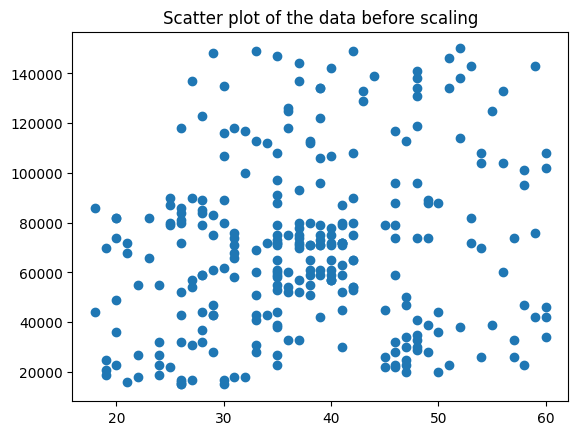

In [173]:
plt.scatter(x_train['Age'], x_train['Salary'])
plt.title('Scatter plot of the data before scaling')
plt.show()

In [174]:
scaler = StandardScaler()
scaler.fit(x_train)
xtrain_scaled = scaler.transform(x_train)
xtest_scaled = scaler.transform(x_test)

In [175]:
xtrain_scaled = pd.DataFrame(xtrain_scaled , columns = x_train.columns)
xtest_scaled = pd.DataFrame(xtest_scaled ,  columns = x_train.columns)

In [176]:
# Summary statistics agter scaling the data
round(xtrain_scaled.describe(),1)

,Age,Salary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


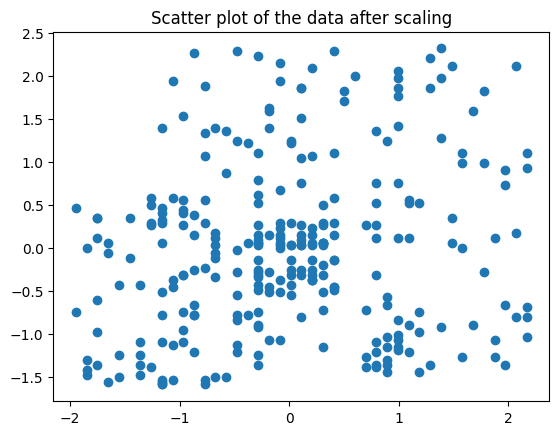

In [177]:
plt.scatter(xtrain_scaled['Age'], xtrain_scaled['Salary'])
plt.title('Scatter plot of the data after scaling')
plt.show()

<div style="text-align:center; background-color:#ffeeba; padding:20px;">
  <h1 style="font-size:36px; color:#dc3545;"><b>2.Remove the Outliers</b></h1>
</div>


In [178]:
# Add an outliers to our dataframe
df = pd.DataFrame(df)
new_data = {'Age': [3, 96, 89, 100, 91],
            'Salary': [1000, 250000, 350000, 200000, 50000],
            'Purchased': [0, 1, 1, 1, 0]}

# Append the new data to the existing DataFrame
df2 = pd.concat([df, pd.DataFrame(new_data)], ignore_index=True)
df2

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
400,3,1000,0
401,96,250000,1
402,89,350000,1
403,100,200000,1


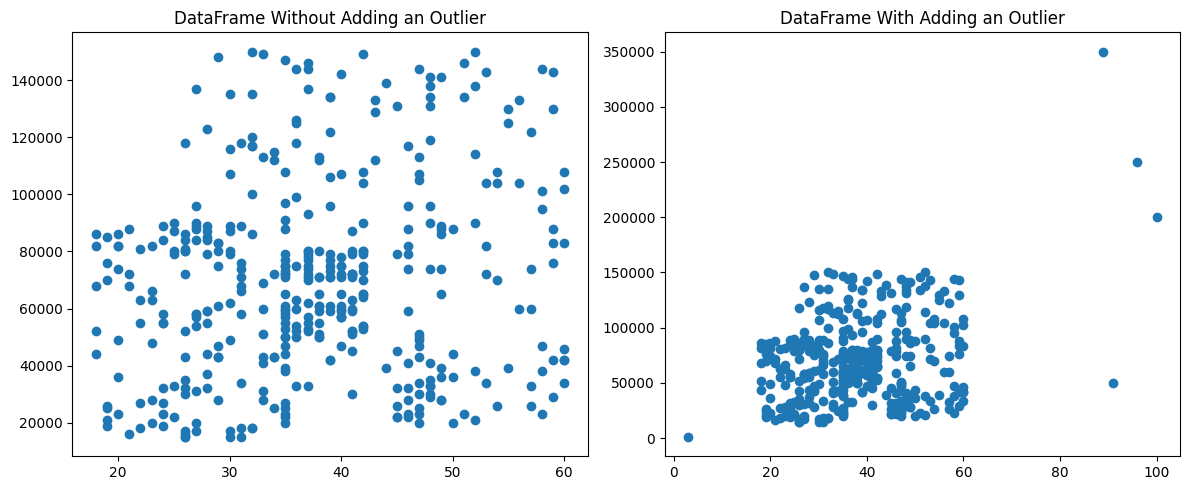

In [179]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.scatter(df['Age'], df['Salary'])
plt.title('DataFrame Without Adding an Outlier')

plt.subplot(1, 2, 2)
plt.scatter(df2['Age'], df2['Salary'])
plt.title('DataFrame With Adding an Outlier')


plt.tight_layout()
plt.show()

In [180]:
# Get the outliers from our data frame using IQR 
Q1 = df2['Age'].quantile(0.25)
Q3 = df2['Age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df2[(df2['Age'] < Q1 - 1.5 * IQR) | (df2['Age'] > Q3 + 1.5 * IQR)]

outliers

,Age,Salary,Purchased
400,3,1000,0
401,96,250000,1
402,89,350000,1
403,100,200000,1
404,91,50000,0


Text(0.5, 1.0, 'DataFrame Without Adding an Outlier')

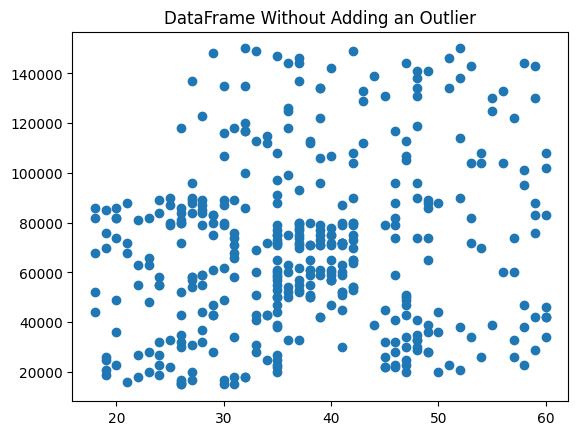

In [181]:
# Drop the outliers
df2.drop(outliers.index, inplace=True)

plt.scatter(df2['Age'], df2['Salary'])
plt.title('DataFrame after dropping all the outlier')